# Overfitting and Underfitting principles

## Import Libraries

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Helper Functions

In [2]:
def func(x):
    ''' Some function to generate dataset '''
    return 0.1*x*x*x + 2*x*x + 7*x + 4

In [3]:
# min and max x values to explore the function on this segment
x_min = -15
x_max = 2

In [4]:
def generate_dataset(x_min, x_max, size=20, random_state=42):
    ''' Generate random dataset from 'x_min' to 'x_max' with 'func' function '''

    rng = np.random.RandomState(random_state)
    x = rng.uniform(low=x_min, high=x_max, size=size)
    y = np.array([func(xi) for xi in x]) + 2 * rng.randn(size)

    return (x, y)

In [5]:
def plot_regression(x_train, y_train,
                    x_test, y_test,
                    x_true, y_true,
                    model, model_label, title):
    '''
    Plot scatter plot of data (train and test), actual function and model function.
    Calculates train and test MSE and outputs them in plot title.

    Parameters:
        x_train (array-like): training set, vector of features
        y_train (array-like): training set, vector of labels
        x_test (array-like): testing set, vector of features
        y_test (array-like): testing set, vector of labels
        x_true (array-like): x obtained with np.arange(x_min, x_max)
        y_true (array-like): actual function values
        model: sklearn model object. Must have predict() method
        model_label (str): description of the model to write in legend
        title (str): title of the plot
    '''

    y_pred = model.predict(x_true.reshape(-1, 1))

    MSE_train = mse(y_train, model.predict(x_train.reshape(-1, 1)))
    MSE_test = mse(y_test, model.predict(x_test.reshape(-1, 1)))

    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label="Train Data")
    plt.scatter(x_test, y_test, color='g', label="Test Data")
    plt.plot(x_true, y_pred, 'r', label=model_label)
    plt.plot(x_true, y_true, label='Actual Function')
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend(loc='lower left', fontsize=14)
    plt.title(title +
              "\nTraining MSE = {:.2f}".format(MSE_train) +
              "\nTesting MSE = {:.2f}".format(MSE_test), fontsize=16)

    # limit of y-axis for ovefitted models
    # min and max y values to visualize the function
    plt.ylim(-7, 42)

In [6]:
def polynomial_regression(degree=1):
    ''' 
    Returns pipeline with PolynomialFeatures(degree), 
    StandardScaler and LinearRegression 
    '''

    return make_pipeline(PolynomialFeatures(degree),
                         StandardScaler(),
                         LinearRegression())

In [32]:
def train_test_mse(x_train, y_train,
                  x_test, y_test,
                  model):
    '''
    Returns train and test MSE calculated based on parameters.

    Parameters:
        x_train (array-like): training set, vector of features
        y_train (array-like): training set, vector of labels
        x_test (array-like): testing set, vector of features
        y_test (array-like): testing set, vector of labels
        model: sklearn model object. Must have predict() method
    
    Returns:
        (MSE_train, MSE_test), tuple of two floats
    '''

    MSE_train = mse(y_train, model.predict(x_train.reshape(-1, 1)))
    MSE_test = mse(y_test, model.predict(x_test.reshape(-1, 1)))

    return (MSE_train, MSE_test)

## Generate Dataset

In [7]:
x, y = generate_dataset(x_min, x_max, size=20)
x_true = np.arange(x_min, x_max, step=0.1)
y_true = np.array([func(xi) for xi in x_true])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Generated Dataset')

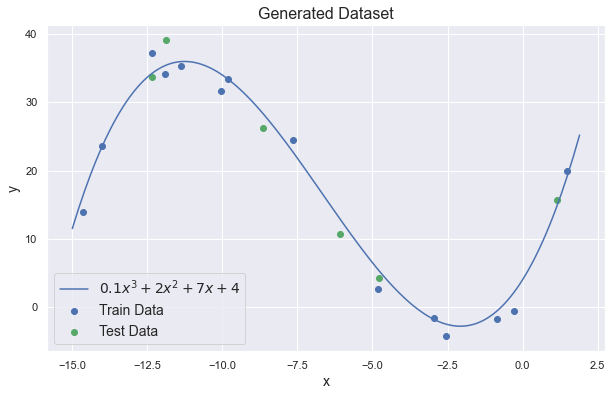

In [8]:
# display generated dataset

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label="Train Data")
plt.scatter(x_test, y_test, color='g', label="Test Data")
plt.plot(x_true, y_true, label='$0.1x^3 + 2x^2 + 7x + 4$')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(loc='lower left', fontsize=14)
plt.title("Generated Dataset", fontsize=16)

## Very simple model

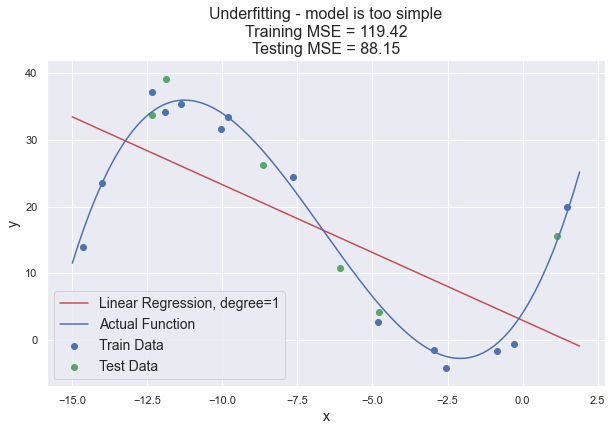

In [10]:
simple_degree = 1

simple_model = polynomial_regression(degree=simple_degree)
simple_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                simple_model,
                model_label=f"Linear Regression, degree={simple_degree}",
                title='Underfitting - model is too simple')

## Good Model

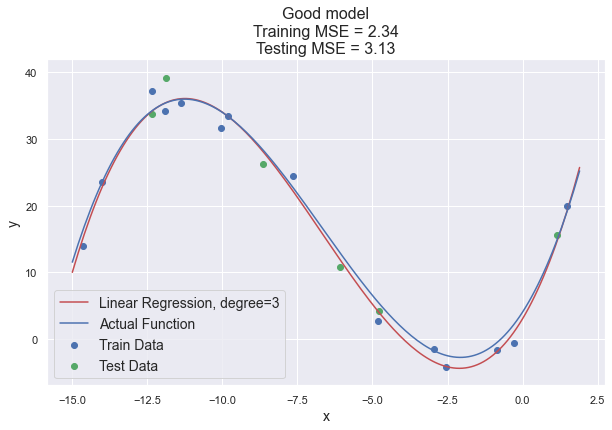

In [38]:
good_degree = 3

good_model = polynomial_regression(degree=good_degree)
good_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                good_model,
                model_label=f"Linear Regression, degree={good_degree}",
                title='Good model')

## Very complex model

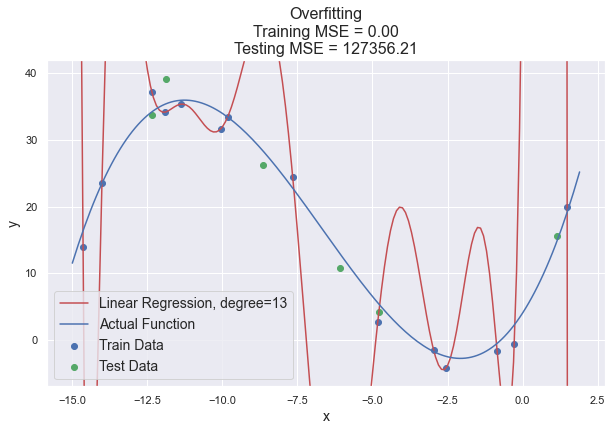

In [45]:
complex_degree = 13

complex_model = polynomial_regression(degree=complex_degree)
complex_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train, 
                x_test, y_test, 
                x_true, y_true,
                complex_model,
                model_label=f"Linear Regression, degree={complex_degree}",
                title='Overfitting')

# Regularization

# Why Getting More Data Sometimes Can't Help

In [57]:
# generate a similar dataset 10 times larger
# and train simple and comlex model
x_big, y_big = generate_dataset(x_min, x_max, size=20*10)
x_big_true = np.arange(x_min, x_max, step=0.1)
y_big_true = np.array([func(xi) for xi in x_big_true])

x_big_train, x_big_test, y_big_train, y_big_test = train_test_split(
    x_big, y_big, test_size=0.3, random_state=42)

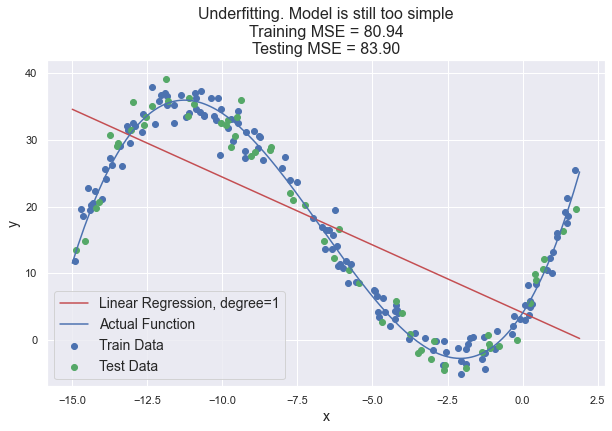

In [59]:
simple_model = polynomial_regression(degree=simple_degree)
simple_model.fit(x_big_train[:, np.newaxis], y_big_train)

plot_regression(x_big_train, y_big_train,
                x_big_test, y_big_test,
                x_big_true, y_big_true,
                simple_model,
                model_label=f"Linear Regression, degree={simple_degree}",
                title='Underfitting. Model is still too simple')

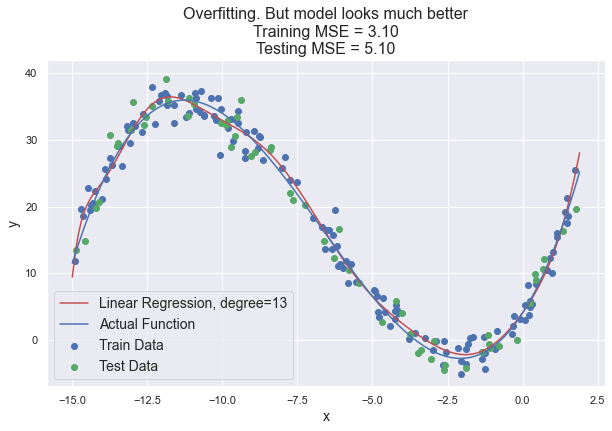

In [60]:
complex_model = polynomial_regression(degree=complex_degree)
complex_model.fit(x_big_train[:, np.newaxis], y_big_train)

plot_regression(x_big_train, y_big_train,
                x_big_test, y_big_test,
                x_big_true, y_big_true,
                complex_model,
                model_label=f"Linear Regression, degree={complex_degree}",
                title='Overfitting. But model looks much better')

# General plot

In [51]:
degrees = range(1, 12)

mse_list_train = []
mse_list_test = []

#
for degree in degrees:
    current_model = polynomial_regression(degree=degree)
    current_model.fit(x_train[:, np.newaxis], y_train)
    mse_train, mse_test = train_test_mse(x_train, y_train,
                                         x_test, y_test,
                                         current_model)
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)

(0.0, 100.0)

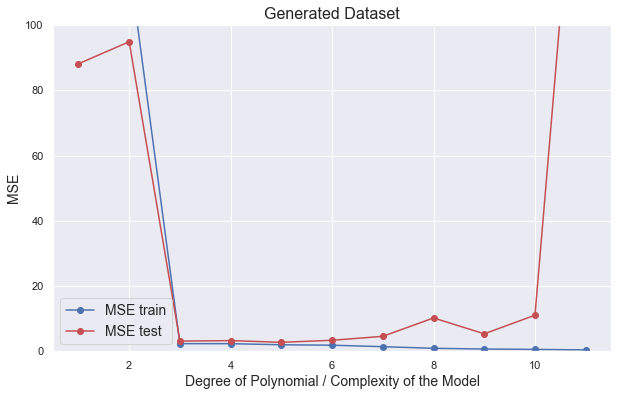

In [52]:
plt.figure(figsize=(10, 6))

plt.plot(degrees, mse_list_train, 'bo-', label='MSE train')
plt.plot(degrees, mse_list_test, 'ro-', label='MSE test')
plt.xlabel("Degree of Polynomial / Complexity of the Model", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.title("Generated Dataset", fontsize=16)

plt.ylim(0, 100)